Dataset Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome    

C:\Users\DELL\AppData\Local\Temp\ipykernel_20900\3854783877.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20900\3854783877.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

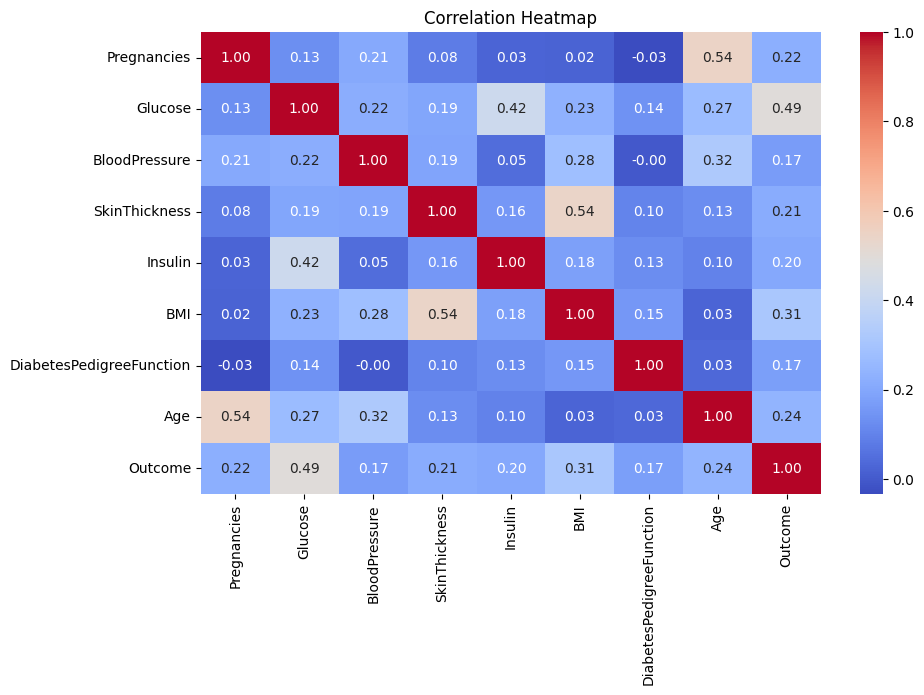

C:\Users\DELL\AppData\Local\Temp\ipykernel_20900\3854783877.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


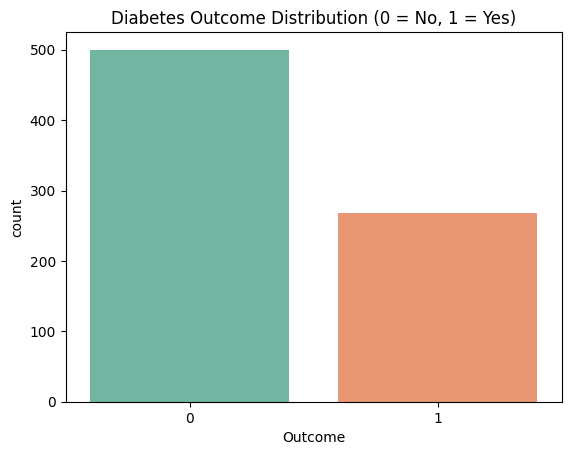

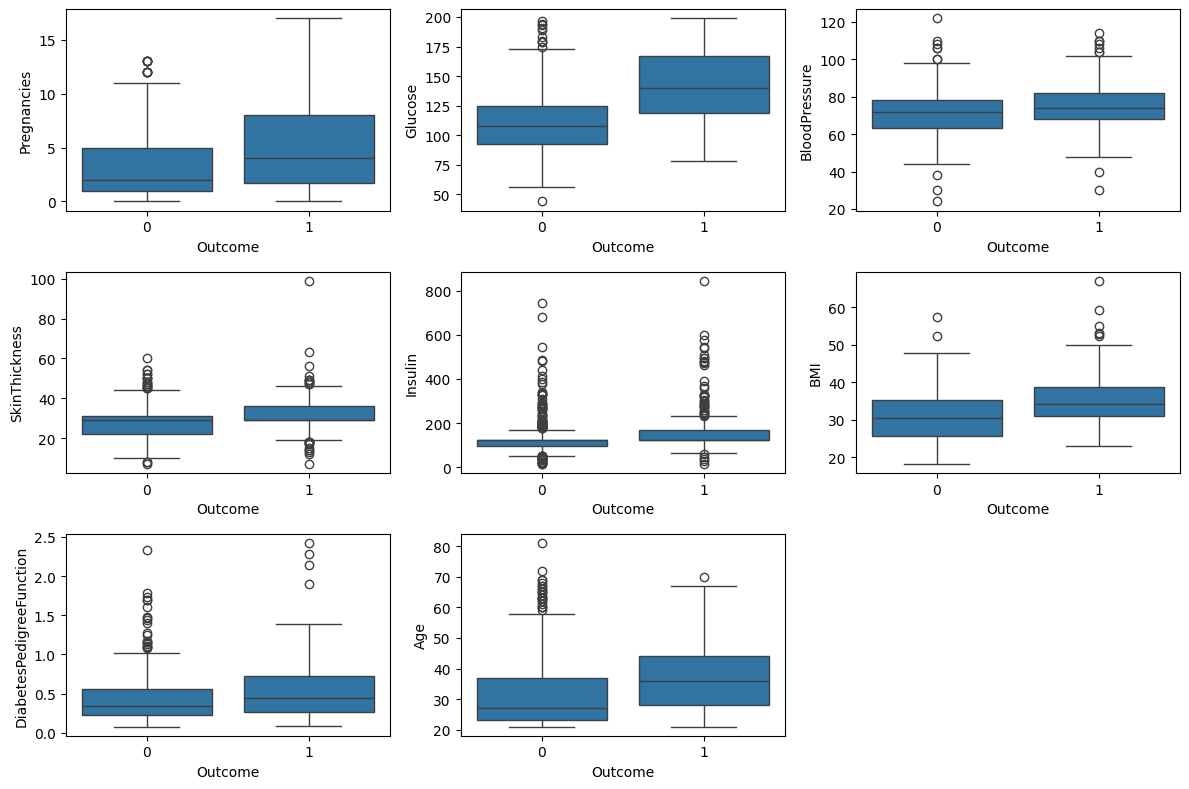


📊 Logistic Regression Evaluation:
Accuracy: 0.7077922077922078
Confusion Matrix:
 [[82 18]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


📊 K-Nearest Neighbors Evaluation:
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[83 17]
 [21 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



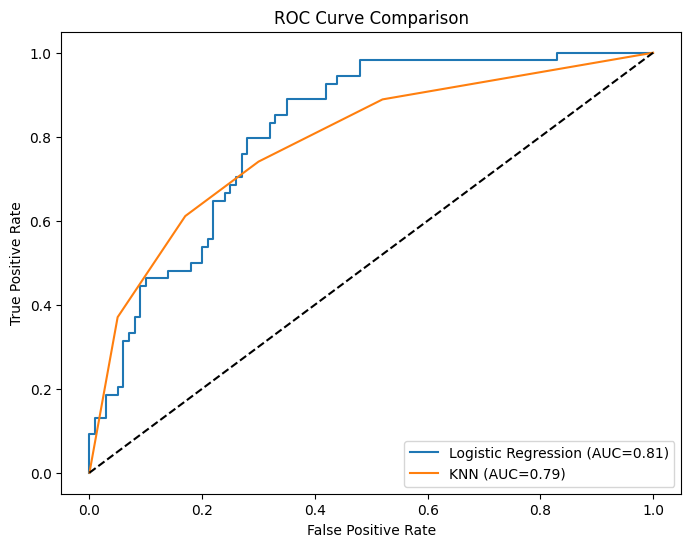


✅ Diabetes Prediction Project Completed Successfully!


In [1]:
# 📌 Diabetes Prediction Project (PIMA Indians Dataset)

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# 2. Load Dataset
df = pd.read_csv("diabetes.csv")   # ensure diabetes.csv is in the same folder
print("Dataset Shape:", df.shape)
print(df.head())

# 3. Data Preprocessing
print("\nMissing values per column:")
print(df.isnull().sum())

# In this dataset, 0 values in certain columns represent missing values
cols_with_zero_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols_with_zero_as_missing:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after treatment:")
print(df.isnull().sum())

# 4. Exploratory Data Analysis (EDA)
print("\nStatistical Summary:")
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Target
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Diabetes Outcome Distribution (0 = No, 1 = Yes)")
plt.show()

# Boxplots for feature vs Outcome
plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.tight_layout()
plt.show()

# 5. Feature & Target Split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# 9. K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# 10. Evaluation Metrics

def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Logistic Regression Evaluation
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# KNN Evaluation
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")

# 11. ROC Curve (Logistic vs KNN)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC={roc_auc_score(y_test, y_prob_knn):.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

print("\n✅ Diabetes Prediction Project Completed Successfully!")
